In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.io as pio

In [26]:
# load cleaned dataset 

df = pd.read_csv(r"C:\Users\Caster Zhang\Downloads\clean_data_1.csv")

In [27]:
# Set Plotly to open in the browser
pio.renderers.default = 'browser'


# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Select top products to choose from (e.g., top 10 by sales)
top_products = df['StockCode'].value_counts().head(10).index.tolist()

# Prepare a dictionary to store data for each product
product_weekly_quantity = {}
product_weekly_revenue = {}

for product in top_products:
    product_df = df[df['StockCode'] == product]
    product_df = product_df.set_index('InvoiceDate')
    
    # Weekly data
    weekly_quantity = product_df['Quantity'].resample('W').sum()
    weekly_revenue = product_df['Revenue'].resample('W').sum()
    
    product_weekly_quantity[product] = weekly_quantity
    product_weekly_revenue[product] = weekly_revenue

# --- Create figure ---
fig = go.Figure()

# Add one set of traces per product
for i, product in enumerate(top_products):
    # Quantity Bar
    fig.add_trace(
        go.Bar(
            x=product_weekly_quantity[product].index,
            y=product_weekly_quantity[product].values,
            name=f'Quantity Bar - {product}',
            marker_color='blue',
            visible=(i==0)
        )
    )
    # Quantity Scatter
    fig.add_trace(
        go.Scatter(
            x=product_weekly_quantity[product].index,
            y=product_weekly_quantity[product].values,
            mode='markers+lines',
            name=f'Quantity Scatter - {product}',
            marker_color='blue',
            visible=(i==0)
        )
    )
    # Revenue Bar
    fig.add_trace(
        go.Bar(
            x=product_weekly_revenue[product].index,
            y=product_weekly_revenue[product].values,
            name=f'Revenue Bar - {product}',
            marker_color='orange',
            visible=(i==0)
        )
    )
    # Revenue Scatter
    fig.add_trace(
        go.Scatter(
            x=product_weekly_revenue[product].index,
            y=product_weekly_revenue[product].values,
            mode='markers+lines',
            name=f'Revenue Scatter - {product}',
            marker_color='orange',
            visible=(i==0)
        )
    )

# Create buttons for dropdown
buttons = []
for i, product in enumerate(top_products):
    visible = [False] * len(top_products) * 4  # 4 traces per product now
    visible[4*i] = True      # Quantity Bar
    visible[4*i + 1] = True  # Quantity Scatter
    visible[4*i + 2] = True  # Revenue Bar
    visible[4*i + 3] = True  # Revenue Scatter

    buttons.append(
        dict(
            label=product,
            method='update',
            args=[{'visible': visible},
                  {'title': f'Weekly Quantity and Revenue of Product {product}'}]
        )
    )

# Update layout with dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=1.15,
            y=1,
            xanchor='left',
            yanchor='top'
        )
    ],
    title=f'Weekly Quantity and Revenue of Product {top_products[0]}',
    xaxis_title='Week',
    yaxis_title='Value',
    height=700,
    width=1100
)

fig.show()

C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_17412\4014434078.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# Original DataSet

In [28]:
df2 = pd.read_csv(r"C:\Users\Caster Zhang\Downloads\Mode_Craft_Ecommerce_Data - Online_Retail.csv")

C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_17412\3830127055.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



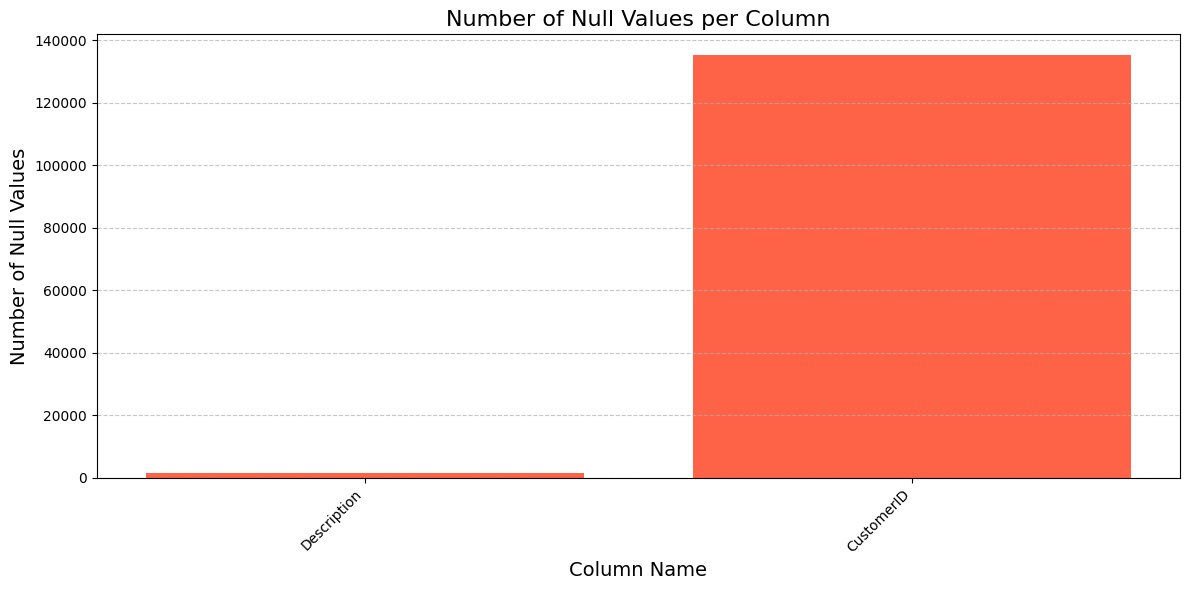

In [29]:
# Calculate number of nulls per column
null_counts = df2.isnull().sum()

# Filter columns that actually have missing values (optional)
null_counts = null_counts[null_counts > 0]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(null_counts.index, null_counts.values, color='tomato')
plt.title('Number of Null Values per Column', fontsize=16)
plt.xlabel('Column Name', fontsize=14)
plt.ylabel('Number of Null Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Caster Zhang\AppData\Local\Temp\ipykernel_17412\2209102294.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

